# 1. Cross-Validation(교차 검증)
- 전체 데이터를 학습에 활용 할 수 있는 방법

- 전체데이터셋을 기준으로 검증 데이터를 바꿔가며 훈련 하고, 평균값을 도출해낸다.

- 5개의 Fold로 나누는 방법

    |실험1|검증|훈련|훈련|훈련|훈련|
    |:---:|:---:|:---:|:---:|:---:|:---:|
    |실험2|훈련|검증|훈련|훈련|훈련|
    |실험3|훈련|훈련|검증|훈련|훈련|
    |실험4|훈련|훈련|훈련|검증|훈련|
    |실험5|훈련|훈련|훈련|훈련|검증|

- 언제 사용해야할까?
    - 데이터 셋의 갯수가 적을때

- 만약 각 실험에서 비슷한 결과가 나오면 교차검증없이 단일 검증이 더욱더 효율적 일 수 있다.

In [16]:
import pandas as pd

mel_data = pd.read_csv('mel_train.csv')
mel_data.set_index('Id',inplace=True)

In [17]:
# 문자열인 컬럼 골라내기
str_dt_cols = mel_data.select_dtypes('object').columns

# 이번에는 숫자인 데이터 타입만 학습함
num_df = mel_data.drop(columns=str_dt_cols)

# 데이터 정제 완료
X = num_df.drop(columns="SalePrice")
y = num_df.SalePrice

In [18]:
# 파이프 라인 구성하기
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 전처리기 na값 자동채움과
# 랜덤 포레스트의 모델을 파이프라인으로 구축,
# 동일한 결과를 위한 random_state=0
my_pipe = Pipeline(steps=[
    ('preprocessor', SimpleImputer()) ,
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

In [19]:
# 교차 검증을 위한 라이브러리 불러오기
from sklearn.model_selection import cross_val_score

#neg_mab_error 의 결과는 -으로 나오기 때문에 -1 을 곱해준다.
scores = -1 * cross_val_score(my_pipe, X, y,
                              cv=4,
                              scoring='neg_mean_absolute_error')

print(scores.mean())

18163.269082191782


## 함수를 만들어 비교해보기

In [20]:
def get_score(n_estimators, cv):
    my_pipe = Pipeline(steps=[
        ('preprocessor', SimpleImputer()) ,
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])

    scores = -1 * cross_val_score(my_pipe, X, y,
                                  cv=cv,
                                  scoring='neg_mean_absolute_error')

    return scores.mean()

### 다양한 파라미터로 값 구해보기

In [27]:
results_2cv ={}
for i in list(range(50,401,50)):
    results_2cv[i]=get_score(i,2)

results_3cv ={}
for i in list(range(50,401,50)):
    results_3cv[i]=get_score(i,3)

results_4cv ={}
for i in list(range(50,401,50)):
    results_4cv[i]=get_score(i,4)

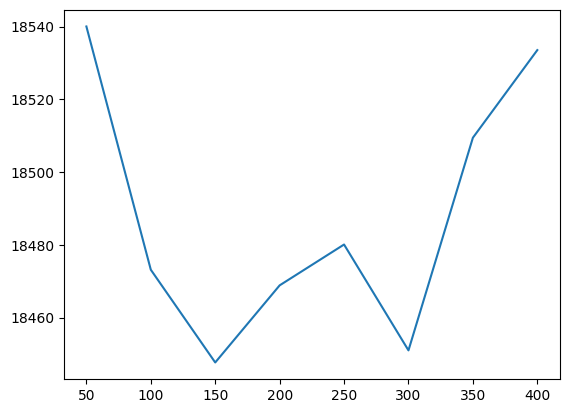

18447.673022831048

In [32]:
# 그래프로 그려보기

import matplotlib.pyplot as plt

plt.plot(list(results_2cv.keys()), list(results_2cv.values()))
plt.show()
results_2cv[150]

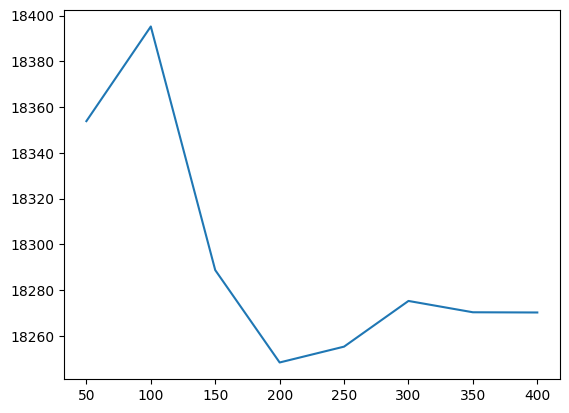

18248.345889801505

In [33]:
plt.plot(list(results_3cv.keys()), list(results_3cv.values()))
plt.show()

results_3cv[200]

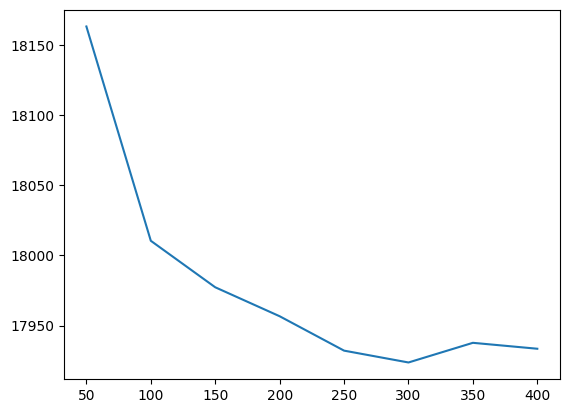

{50: 18163.269082191782,
 100: 18010.449573059363,
 150: 17977.296861491628,
 200: 17956.638316210046,
 250: 17932.110586301373,
 300: 17923.666974124808,
 350: 17937.688703848664,
 400: 17933.462360730595}

In [34]:
plt.plot(list(results_4cv.keys()), list(results_4cv.values()))
plt.show()

results_4cv

In [36]:
results_10cv ={}
for i in list(range(50,401,50)):
    results_10cv[i]=get_score(i,10)

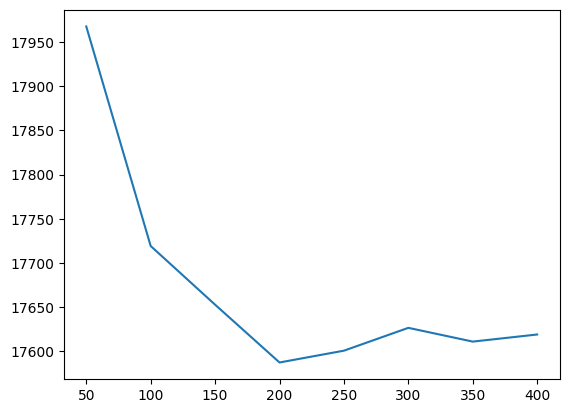

{50: 17967.517433789955,
 100: 17719.264913242012,
 150: 17652.907674277012,
 200: 17587.551389269407,
 250: 17600.901623744296,
 300: 17626.716962709284,
 350: 17611.158948001117,
 400: 17619.198151989563}

In [38]:
plt.plot(list(results_10cv.keys()), list(results_10cv.values()))
plt.show()

results_10cv

In [49]:
total = []
total.append(results_2cv)
total.append(results_3cv)
total.append(results_4cv)
total.append(results_10cv)

In [60]:

for dict_ in total:
    print(min(dict_.values()))

18447.673022831048
18248.345889801505
17923.666974124808
17587.551389269407


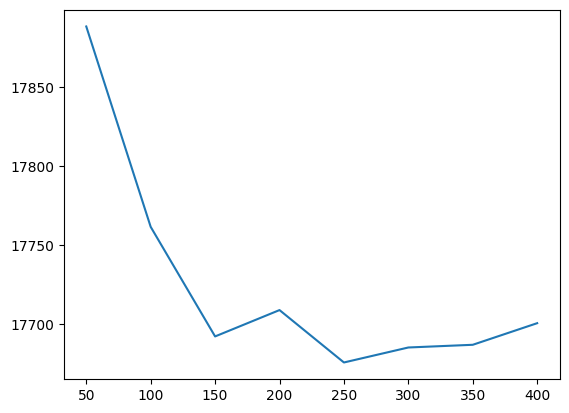

In [64]:
results_20cv ={}
for i in list(range(50,401,50)):
    results_20cv[i]=get_score(i,20)

plt.plot(list(results_20cv.keys()), list(results_20cv.values()))
plt.show()

In [66]:
min(results_20cv.values())

17675.611637442922